# MECANISMO CINCO BARRAS

## ANIMACIÓN

In [1]:
#! /usr/bin/env python

import numpy as np
import math as math
import array as arr
import pprint  # para depurar
import matplotlib.pyplot as plt  #Para graficas
import matplotlib.animation as animation
import scipy.integrate as integrate 
import os
from time import sleep
#%matplotlib inline (Para notebook)



print ('MECANISMO DE CINCO BARRAS')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3:'))
meca["L4"] = float (input ('Introduce longitud L4: '))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["beta"] = float (input('Introduce angulo inicial beta: ')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [meca["L1"]], [1], [0.2], [meca["XB"]+meca["L4"]], [0.1], [meca["theta"]], [meca["beta"]]])
print('q: ' + str(q))

# JACOBIANO
def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((8,8))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = -2*(X3-X2)
    Jacob[2,3] = -2*(Y3-Y2)
    Jacob[2,4] = 2*(X3-X2)
    Jacob[2,5] = 2*(Y3-Y2)
    Jacob[3,4] = -2*(meca["XB"]-X3)
    Jacob[3,5] = -2*(meca["YB"]-Y3)

    if (abs(math.cos(theta)) < 0.95 ):
        Jacob[4,6] = meca["L1"]*math.sin(theta)
        Jacob[4,0] = 1
    else:
        Jacob[4,6] = -meca["L1"]*math.cos(theta)
        Jacob[4,1] = 1


    if (abs(math.cos(beta)) < 0.95 ):
        Jacob[5,7] = meca["L4"]*math.sin(beta)
        Jacob[5,4] = 1
    else:
        Jacob[5,7] = -meca["L4"]*math.cos(beta)
        Jacob[5,5] = 1

    Jacob[6,6] = 1
    Jacob[7,7] = 1

    return Jacob


def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((8,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
	
    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (X3-X2)**2 + (Y3-Y2)**2 - meca["L3"]**2
    Phi[3] = (meca["XB"] - X3)**2 + (meca["YB"] - Y3)**2 - meca["L4"]**2

    if (abs(math.cos(theta)) < 0.95 ):
        Phi[4] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[4] = Y1-meca["L1"]*math.sin(theta)
		
    if (abs(math.cos(beta)) < 0.95 ):
        Phi[5] = (X3-meca["XB"])-meca["L4"]*math.cos(beta)
    else: 
        Phi[5] = Y3-meca["L4"]*math.sin(beta)
		
    return Phi



def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((8,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):
        #print("q=")
        #pprint.pprint(q)


        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        X3 = q[4]
        Y3 = q[5]
        theta = q[6]
        beta = q[7]
       
        fi=Phi(q,meca)

        J = jacob_Phiq(q,meca)

        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1


    return q


def dibuja_mecanismo(q, meca):


    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
    
	
    plt.axis('equal')
    
    
    plt.plot ([meca["XA"], X1], [meca["YA"], Y1])    #[pos inicial (x1,x2), pos final (y1,y2)]
    plt.plot ([X1, X2], [Y1, Y2])  
    plt.plot ([X2, X3], [Y2, Y3])  
    plt.plot([X3,meca["XB"]], [Y3, meca["YB"]])
	
    plt.plot(meca["XA"], meca["YA"], 'bo')  
    plt.plot(meca["XB"], meca["YB"], 'go')
	
    plt.show()#block=False) 
    return






MECANISMO DE CINCO BARRAS
Introduce longitud L1:1
Introduce longitud L2:2
Introduce longitud L3:2
Introduce longitud L4: 1
Introduce angulo inicial theta:0.5
Introduce angulo inicial beta: 0.5
Introduce coordenada en x del punto B:4
q: [[0.1]
 [1. ]
 [1. ]
 [0.2]
 [5. ]
 [0.1]
 [0.5]
 [0.5]]


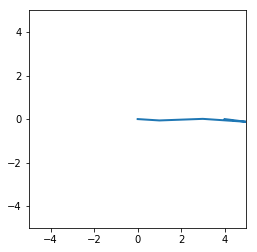

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( -5, 5))
ax.set_ylim((-5,5))
ax.set_aspect('equal')

line, = ax.plot([], [], lw=2)

last_q = q

def init():
    line.set_data([], [])
    return (line,)

def animate(i,q,meca):
    global last_q
    q = last_q
    # i: contador de iteracion: hay que mapearla a un ángulo de la manivela
    omega=2*3.14159/100  # vel. angular
    q[6] = i*omega
    q[7] = i*omega*2

    #llamar problema de pos:    
    q = resuelve_prob_posicion(q, meca)
    last_q = q
    
    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
        
    x=[meca["XA"], X1, X2, X3, meca["XB"]]
    y=[meca["YA"], Y1, Y2, Y3, meca["YB"]]
  
    
    line.set_data(x, y)
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(q,meca),
                               frames=100, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())


q
array([[1.00000000e+00],
       [0.00000000e+00],
       [3.00000000e+00],
       [3.01879789e-09],
       [5.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00]])


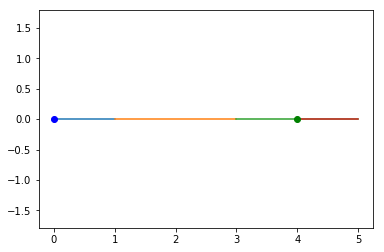

q
array([[0.9961947 ],
       [0.08715567],
       [2.9961947 ],
       [0.08715568],
       [4.9961947 ],
       [0.08715567],
       [0.08726639],
       [0.08726639]])


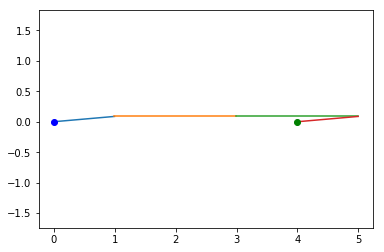

q
array([[0.98480778],
       [0.17364803],
       [2.98480778],
       [0.17364804],
       [4.98480778],
       [0.17364803],
       [0.17453278],
       [0.17453278]])


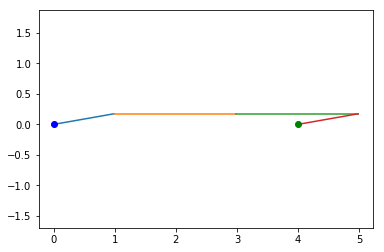

q
array([[0.96592588],
       [0.25881883],
       [2.96592588],
       [0.25881886],
       [4.96592588],
       [0.25881883],
       [0.26179917],
       [0.26179917]])


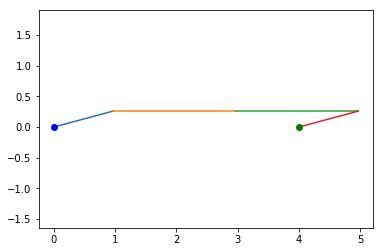

q
array([[0.93969272],
       [0.34201987],
       [2.93969272],
       [0.34201989],
       [4.93969272],
       [0.34201987],
       [0.34906556],
       [0.34906556]])


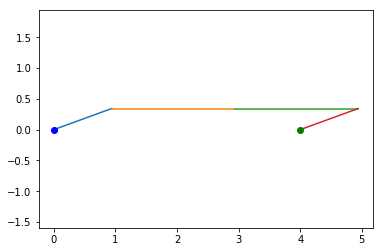

q
array([[0.90630794],
       [0.42261793],
       [2.90630794],
       [0.42261794],
       [4.90630794],
       [0.42261793],
       [0.43633194],
       [0.43633194]])


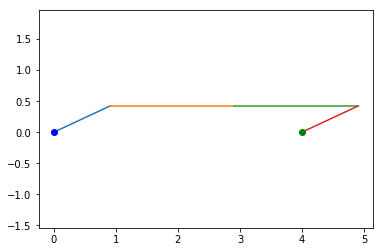

q
array([[0.86602562],
       [0.49999962],
       [2.86602562],
       [0.49999964],
       [4.86602562],
       [0.49999962],
       [0.52359833],
       [0.52359833]])


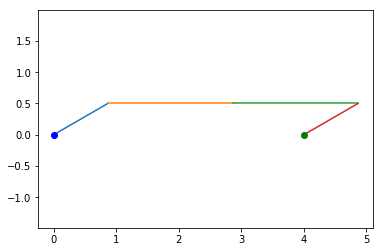

q
array([[0.81915234],
       [0.57357601],
       [2.81915234],
       [0.57357613],
       [4.81915234],
       [0.57357601],
       [0.61086472],
       [0.61086472]])


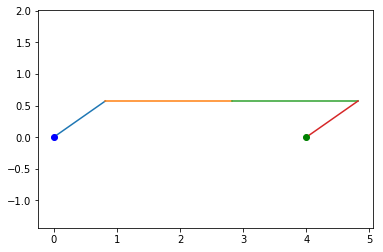

q
array([[0.76604482],
       [0.64278716],
       [2.76604482],
       [0.64278718],
       [4.76604482],
       [0.64278716],
       [0.69813111],
       [0.69813111]])


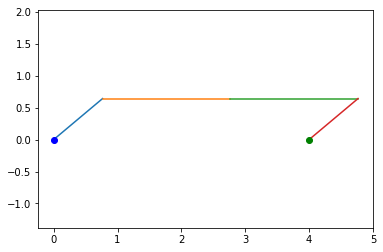

q
array([[0.70710725],
       [0.70710631],
       [2.70710725],
       [0.70710632],
       [4.70710725],
       [0.70710631],
       [0.7853975 ],
       [0.7853975 ]])


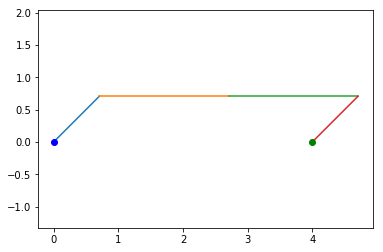

q
array([[0.64278817],
       [0.76604397],
       [2.64278817],
       [0.76604399],
       [4.64278817],
       [0.76604397],
       [0.87266389],
       [0.87266389]])


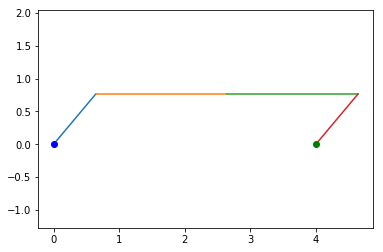

q
array([[0.5735771 ],
       [0.81915158],
       [2.5735771 ],
       [0.81915159],
       [4.5735771 ],
       [0.81915158],
       [0.95993028],
       [0.95993028]])


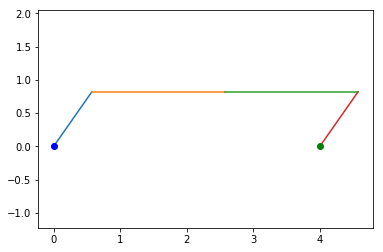

q
array([[0.50000077],
       [0.86602496],
       [2.50000077],
       [0.86602497],
       [4.50000077],
       [0.86602496],
       [1.04719667],
       [1.04719667]])


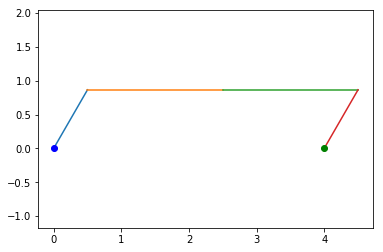

q
array([[0.42261913],
       [0.90630738],
       [2.42261913],
       [0.9063074 ],
       [4.42261913],
       [0.90630738],
       [1.13446306],
       [1.13446306]])


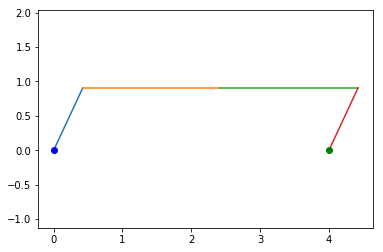

q
array([[0.34202111],
       [0.93969227],
       [2.34202111],
       [0.93969227],
       [4.34202111],
       [0.93969227],
       [1.22172944],
       [1.22172944]])


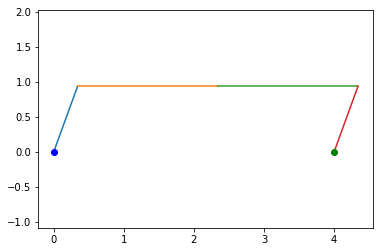

q
array([[0.25882011],
       [0.96592554],
       [2.25882011],
       [0.96592552],
       [4.25882011],
       [0.96592554],
       [1.30899583],
       [1.30899583]])


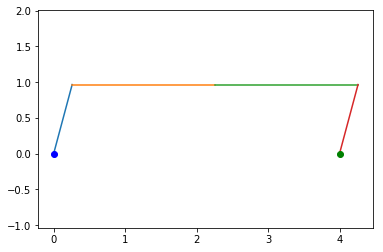

q
array([[0.17364934],
       [0.98480755],
       [2.17364934],
       [0.98480754],
       [4.17364934],
       [0.98480755],
       [1.39626222],
       [1.39626222]])


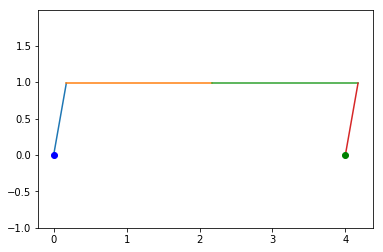

q
array([[0.08715699],
       [0.99619459],
       [2.08715699],
       [0.99619458],
       [4.08715699],
       [0.99619459],
       [1.48352861],
       [1.48352861]])


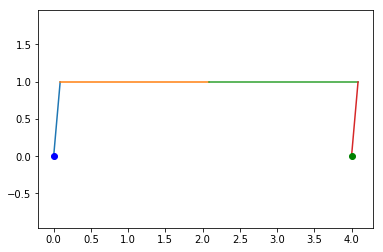

q
array([[1.32679490e-06],
       [1.00000000e+00],
       [2.00000133e+00],
       [9.99999998e-01],
       [4.00000133e+00],
       [1.00000000e+00],
       [1.57079500e+00],
       [1.57079500e+00]])


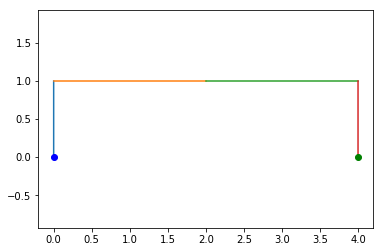

q
array([[-0.08715435],
       [ 0.99619482],
       [ 1.91284565],
       [ 0.99619483],
       [ 3.91284565],
       [ 0.99619482],
       [ 1.65806139],
       [ 1.65806139]])


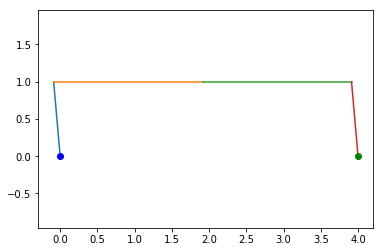

q
array([[-0.17364673],
       [ 0.98480801],
       [ 1.82635327],
       [ 0.98480802],
       [ 3.82635327],
       [ 0.98480801],
       [ 1.74532778],
       [ 1.74532778]])


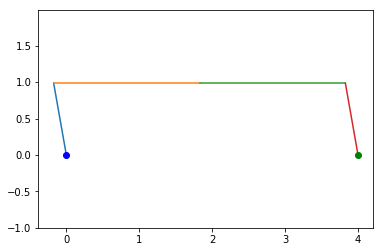

q
array([[-0.25881755],
       [ 0.96592623],
       [ 1.74118245],
       [ 0.96592624],
       [ 3.74118245],
       [ 0.96592623],
       [ 1.83259417],
       [ 1.83259417]])


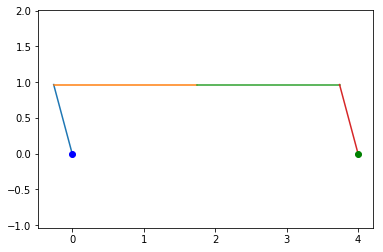

q
array([[-0.34201862],
       [ 0.93969318],
       [ 1.65798138],
       [ 0.93969319],
       [ 3.65798138],
       [ 0.93969318],
       [ 1.91986056],
       [ 1.91986056]])


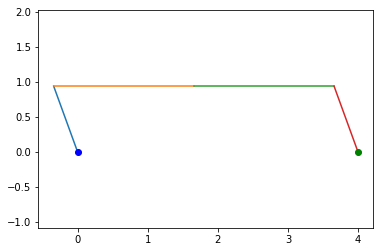

q
array([[-0.42261673],
       [ 0.9063085 ],
       [ 1.57738327],
       [ 0.90630852],
       [ 3.57738327],
       [ 0.9063085 ],
       [ 2.00712694],
       [ 2.00712694]])


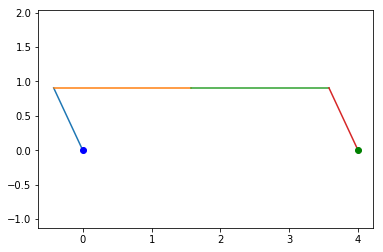

q
array([[-0.49999847],
       [ 0.86602629],
       [ 1.50000153],
       [ 0.8660263 ],
       [ 3.50000153],
       [ 0.86602629],
       [ 2.09439333],
       [ 2.09439333]])


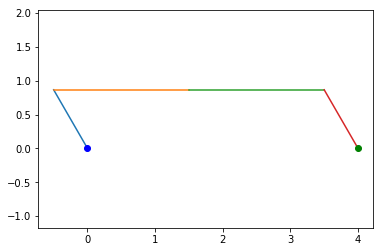

q
array([[-0.57357493],
       [ 0.8191531 ],
       [ 1.42642507],
       [ 0.81915311],
       [ 3.42642507],
       [ 0.8191531 ],
       [ 2.18165972],
       [ 2.18165972]])


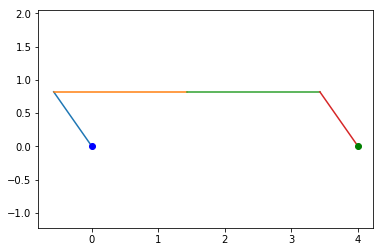

q
array([[-0.64278614],
       [ 0.76604568],
       [ 1.35721386],
       [ 0.76604569],
       [ 3.35721386],
       [ 0.76604568],
       [ 2.26892611],
       [ 2.26892611]])


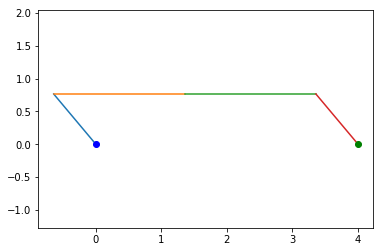

q
array([[-0.70710537],
       [ 0.70710819],
       [ 1.29289463],
       [ 0.7071082 ],
       [ 3.29289463],
       [ 0.70710819],
       [ 2.3561925 ],
       [ 2.3561925 ]])


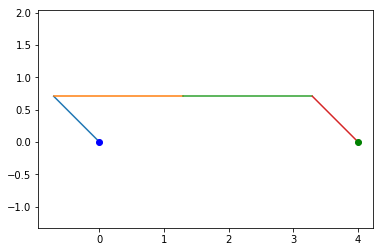

q
array([[-0.76604312],
       [ 0.64278919],
       [ 1.23395688],
       [ 0.6427892 ],
       [ 3.23395688],
       [ 0.64278919],
       [ 2.44345889],
       [ 2.44345889]])


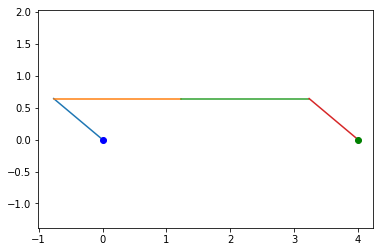

q
array([[-0.81915082],
       [ 0.57357819],
       [ 1.18084918],
       [ 0.57357819],
       [ 3.18084918],
       [ 0.57357819],
       [ 2.53072528],
       [ 2.53072528]])


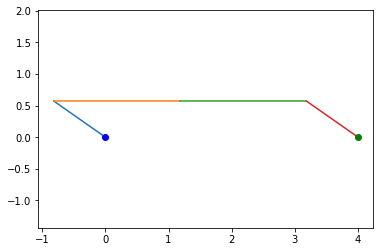

q
array([[-0.8660243 ],
       [ 0.50000192],
       [ 1.1339757 ],
       [ 0.50000192],
       [ 3.1339757 ],
       [ 0.50000192],
       [ 2.61799167],
       [ 2.61799167]])


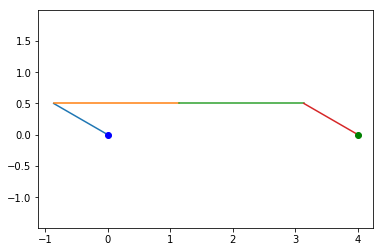

q
array([[-0.90630682],
       [ 0.42262033],
       [ 1.09369318],
       [ 0.42262036],
       [ 3.09369318],
       [ 0.42262033],
       [ 2.70525806],
       [ 2.70525806]])


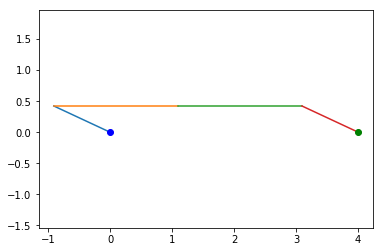

q
array([[-0.93969181],
       [ 0.34202236],
       [ 1.06030819],
       [ 0.34202237],
       [ 3.06030819],
       [ 0.34202236],
       [ 2.79252444],
       [ 2.79252444]])


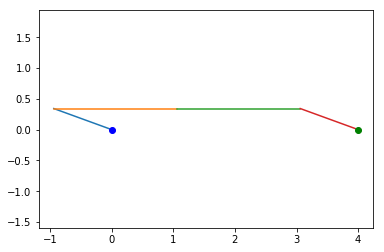

q
array([[-0.9659252 ],
       [ 0.25882139],
       [ 1.0340748 ],
       [ 0.25882138],
       [ 3.0340748 ],
       [ 0.25882139],
       [ 2.87979083],
       [ 2.87979083]])


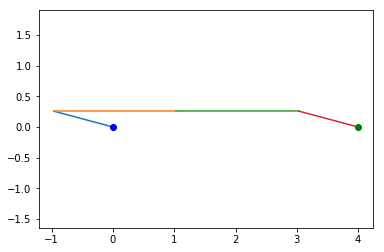

q
array([[-0.98480732],
       [ 0.17365065],
       [ 1.01519268],
       [ 0.17365062],
       [ 3.01519268],
       [ 0.17365065],
       [ 2.96705722],
       [ 2.96705722]])


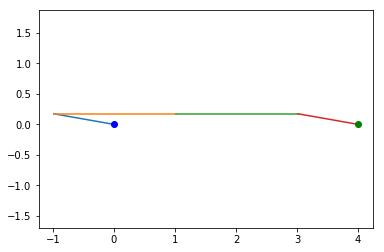

q
array([[-0.99619447],
       [ 0.08715831],
       [ 1.00380553],
       [ 0.08715831],
       [ 3.00380553],
       [ 0.08715831],
       [ 3.05432361],
       [ 3.05432361]])


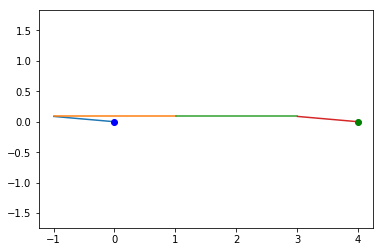

q
array([[-1.00000000e+00],
       [ 2.65358979e-06],
       [ 1.00000000e+00],
       [ 2.65868255e-06],
       [ 3.00000000e+00],
       [ 2.65358979e-06],
       [ 3.14159000e+00],
       [ 3.14159000e+00]])


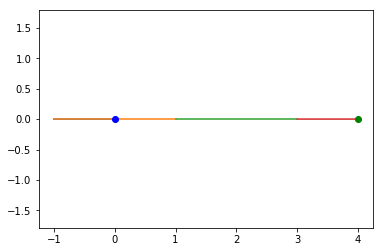

q
array([[-0.99619494],
       [-0.08715303],
       [ 1.00380506],
       [-0.08715304],
       [ 3.00380506],
       [-0.08715303],
       [ 3.22885639],
       [ 3.22885639]])


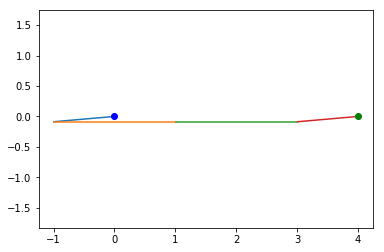

q
array([[-0.98480824],
       [-0.17364542],
       [ 1.01519176],
       [-0.17364543],
       [ 3.01519176],
       [-0.17364542],
       [ 3.31612278],
       [ 3.31612278]])


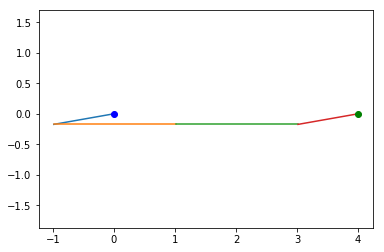

q
array([[-0.96592657],
       [-0.25881627],
       [ 1.03407343],
       [-0.25881626],
       [ 3.03407343],
       [-0.25881627],
       [ 3.40338917],
       [ 3.40338917]])


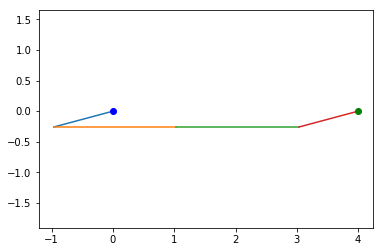

q
array([[-0.93969363],
       [-0.34201737],
       [ 1.06030637],
       [-0.34201737],
       [ 3.06030637],
       [-0.34201737],
       [ 3.49065556],
       [ 3.49065556]])


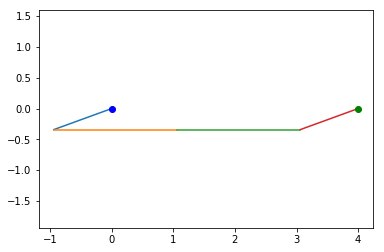

q
array([[-0.90630906],
       [-0.42261552],
       [ 1.09369094],
       [-0.42261551],
       [ 3.09369094],
       [-0.42261552],
       [ 3.57792194],
       [ 3.57792194]])


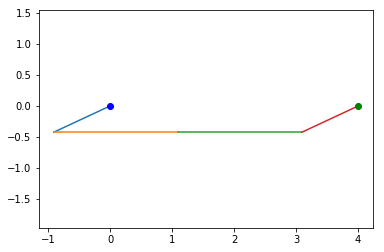

q
array([[-0.86602695],
       [-0.49999732],
       [ 1.13397305],
       [-0.49999731],
       [ 3.13397305],
       [-0.49999732],
       [ 3.66518833],
       [ 3.66518833]])


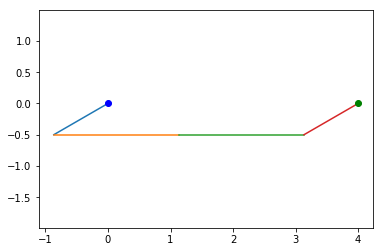

q
array([[-0.81915386],
       [-0.57357384],
       [ 1.18084614],
       [-0.57357384],
       [ 3.18084614],
       [-0.57357384],
       [ 3.75245472],
       [ 3.75245472]])


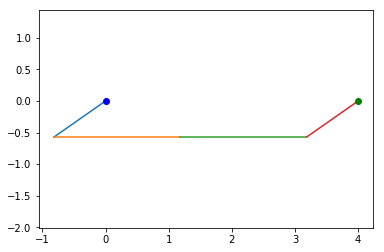

q
array([[-0.76604653],
       [-0.64278513],
       [ 1.23395347],
       [-0.64278512],
       [ 3.23395347],
       [-0.64278513],
       [ 3.83972111],
       [ 3.83972111]])


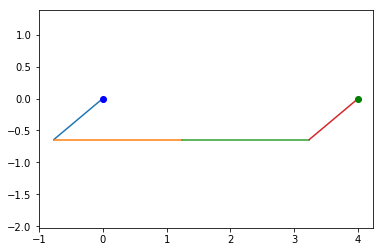

q
array([[-0.70710913],
       [-0.70710444],
       [ 1.29289087],
       [-0.70710443],
       [ 3.29289087],
       [-0.70710444],
       [ 3.9269875 ],
       [ 3.9269875 ]])


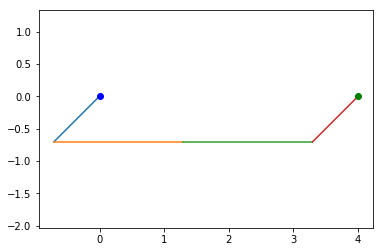

q
array([[-0.64279021],
       [-0.76604226],
       [ 1.35720979],
       [-0.76604225],
       [ 3.35720979],
       [-0.76604226],
       [ 4.01425389],
       [ 4.01425389]])


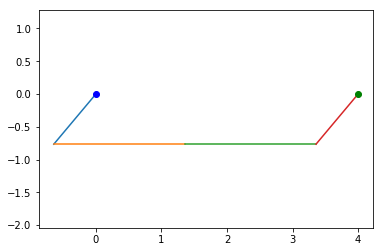

q
array([[-0.57357927],
       [-0.81915006],
       [ 1.42642073],
       [-0.81915004],
       [ 3.42642073],
       [-0.81915006],
       [ 4.10152028],
       [ 4.10152028]])


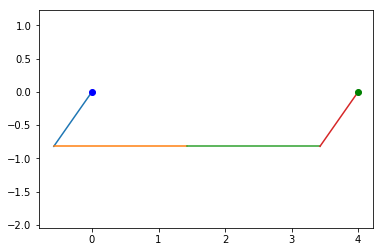

q
array([[-0.50000306],
       [-0.86602363],
       [ 1.49999694],
       [-0.86602363],
       [ 3.49999694],
       [-0.86602363],
       [ 4.18878667],
       [ 4.18878667]])


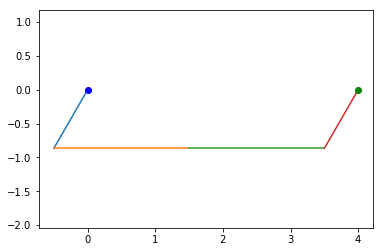

q
array([[-0.42262154],
       [-0.90630626],
       [ 1.57737846],
       [-0.90630625],
       [ 3.57737846],
       [-0.90630626],
       [ 4.27605306],
       [ 4.27605306]])


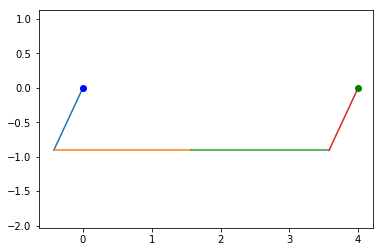

q
array([[-0.34202361],
       [-0.93969136],
       [ 1.65797639],
       [-0.93969134],
       [ 3.65797639],
       [-0.93969136],
       [ 4.36331944],
       [ 4.36331944]])


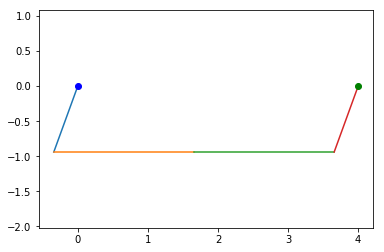

q
array([[-0.25882268],
       [-0.96592485],
       [ 1.74117732],
       [-0.96592484],
       [ 3.74117732],
       [-0.96592485],
       [ 4.45058583],
       [ 4.45058583]])


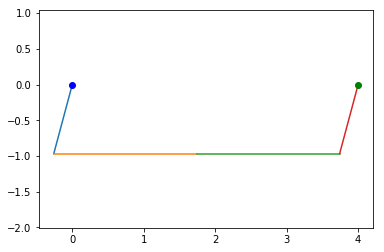

q
array([[-0.17365195],
       [-0.98480709],
       [ 1.82634805],
       [-0.98480707],
       [ 3.82634805],
       [-0.98480709],
       [ 4.53785222],
       [ 4.53785222]])


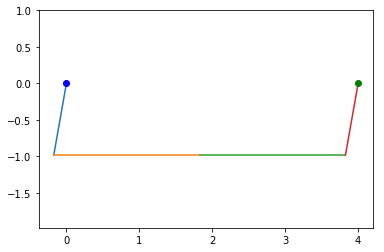

q
array([[-0.08715963],
       [-0.99619436],
       [ 1.91284037],
       [-0.99619435],
       [ 3.91284037],
       [-0.99619436],
       [ 4.62511861],
       [ 4.62511861]])


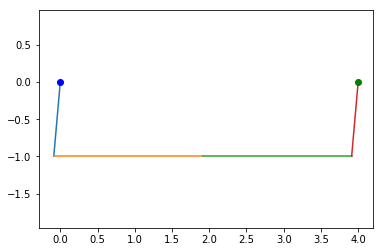

q
array([[-3.98038469e-06],
       [-1.00000000e+00],
       [ 1.99999602e+00],
       [-9.99999982e-01],
       [ 3.99999602e+00],
       [-1.00000000e+00],
       [ 4.71238500e+00],
       [ 4.71238500e+00]])


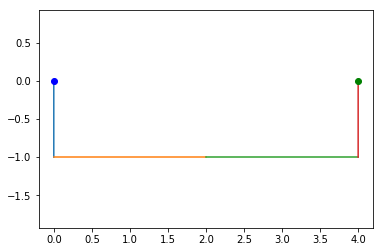

q
array([[ 0.0871517 ],
       [-0.99619505],
       [ 2.0871517 ],
       [-0.99619503],
       [ 4.0871517 ],
       [-0.99619505],
       [ 4.79965139],
       [ 4.79965139]])


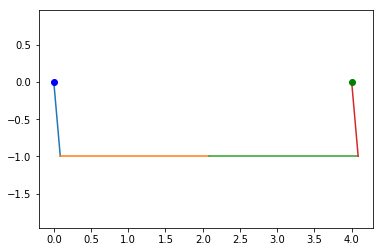

q
array([[ 0.17364411],
       [-0.98480847],
       [ 2.17364411],
       [-0.98480845],
       [ 4.17364411],
       [-0.98480847],
       [ 4.88691778],
       [ 4.88691778]])


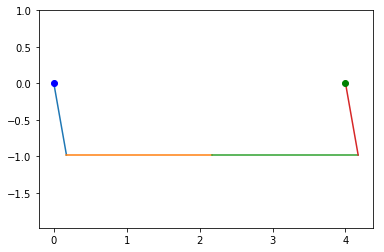

q
array([[ 0.25881499],
       [-0.96592691],
       [ 2.25881499],
       [-0.96592689],
       [ 4.25881499],
       [-0.96592691],
       [ 4.97418417],
       [ 4.97418417]])


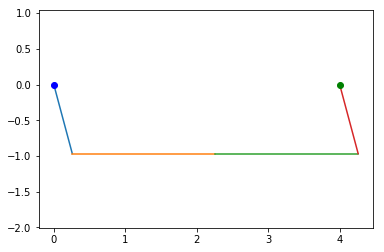

q
array([[ 0.34201613],
       [-0.93969408],
       [ 2.34201613],
       [-0.93969406],
       [ 4.34201613],
       [-0.93969408],
       [ 5.06145056],
       [ 5.06145056]])


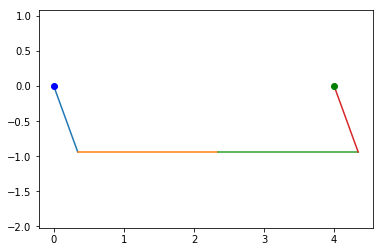

q
array([[ 0.42261432],
       [-0.90630962],
       [ 2.42261432],
       [-0.90630961],
       [ 4.42261432],
       [-0.90630962],
       [ 5.14871694],
       [ 5.14871694]])


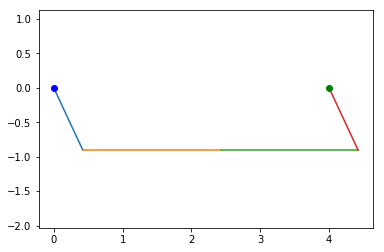

In [ ]:
i=0

while (i<200):
      
    q[6] = i*5*3.14159/180
    q[7] = i*5*3.14159/180
    q = resuelve_prob_posicion(q,meca)
    print ("q")
    pprint.pprint (q)
    dibuja_mecanismo(q,meca) 
    sleep(0.2)
    i= i+1

